In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
student = pd.read_csv('./student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print('Total number of students:',len(student))

Total number of students: 395


In [6]:
#checking the final grade 'G3'
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

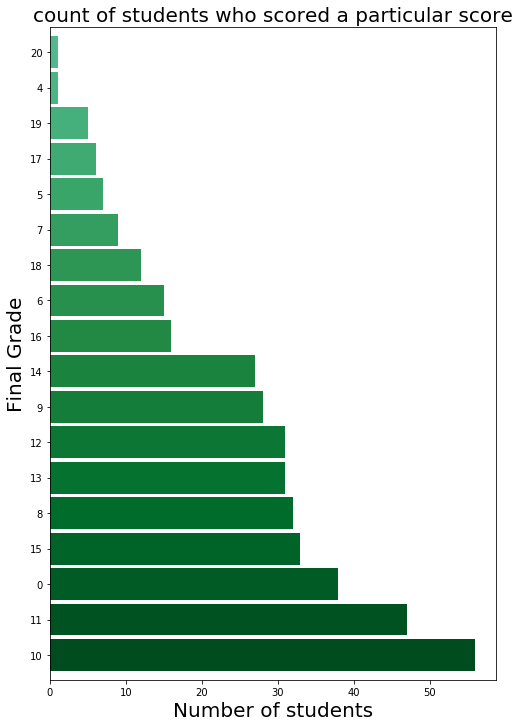

In [26]:
plt.subplots(figsize=(8,12))
a=student['G3'].value_counts()
cnt=a.sort_values(ascending=False)
gcnt=cnt.plot.barh(width=0.9,color=sns.color_palette('BuGn_r',40))
gcnt.axes.set_title('count of students who scored a particular score',fontsize=20)
gcnt.set_xlabel('Number of students', fontsize=20)
gcnt.set_ylabel('Final Grade', fontsize=20)
plt.show()

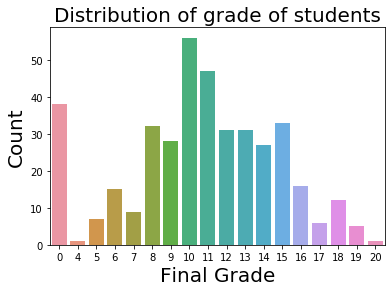

In [28]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [29]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [30]:
male_niguhs = len(student[student['sex'] == 'M'])
female_niguhs = len(student[student['sex'] == 'F'])
print('Number of male students:',male_niguhs)
print('Number of female students:',female_niguhs)

Number of male students: 187
Number of female students: 208


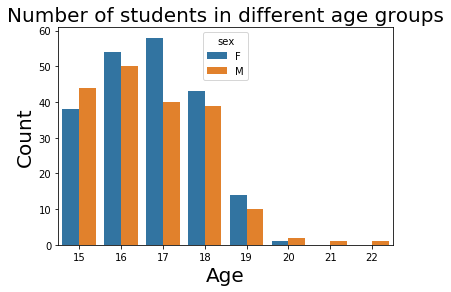

In [32]:
b = sns.countplot('age',hue='sex', data=student)
b.axes.set_title('Number of students in different age groups',fontsize=20)
b.set_xlabel("Age",fontsize=20)
b.set_ylabel("Count",fontsize=20)
plt.show()

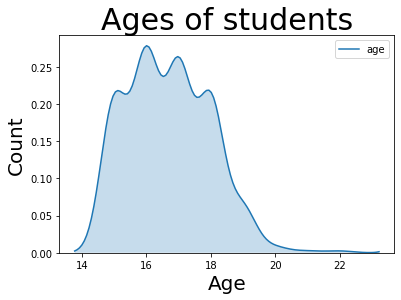

In [33]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

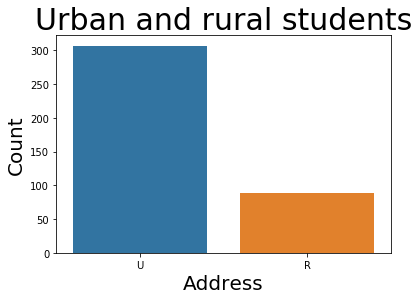

In [34]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

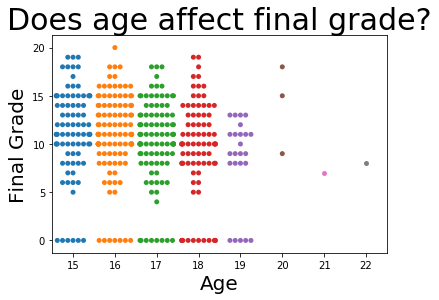

In [36]:
b = sns.swarmplot(x='age', y='G3', data=student)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()
#no relationship between age as marks
#age 20 has only 3 data points hence the inconsistency in statistics. Otherwise there seems to be no clear relation of age or gender with final grade

In [38]:
student['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

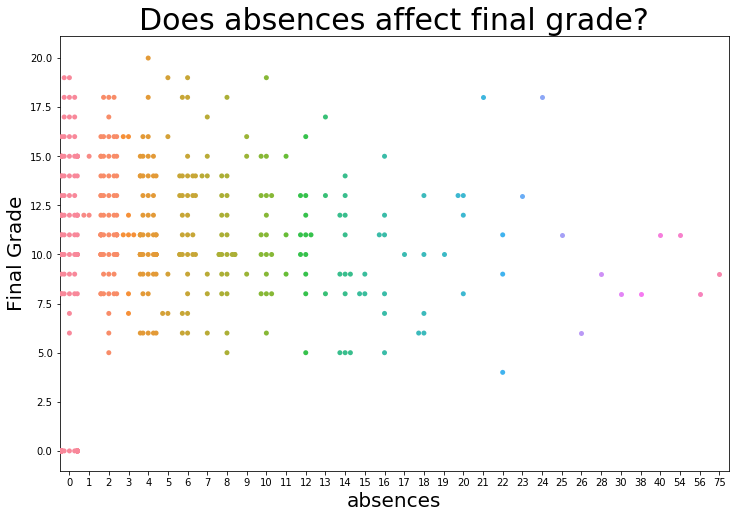

In [46]:
plt.subplots(figsize=(12,8))
b = sns.swarmplot(x='absences', y='G3', data=student)
b.axes.set_title('Does absences affect final grade?', fontsize = 30)
b.set_xlabel('absences', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()
#poeple with less time as lots og

In [47]:
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

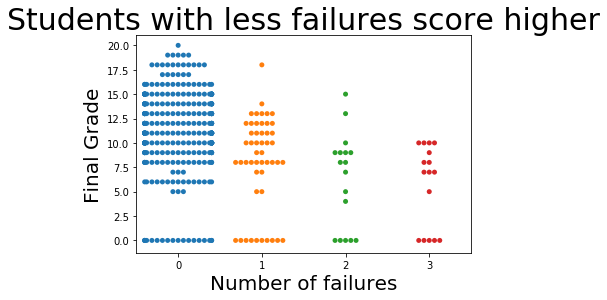

In [48]:
b = sns.swarmplot(x=student['failures'],y=student['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

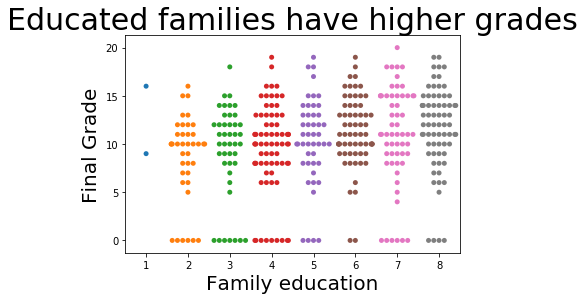

In [55]:
family_ed = student['Fedu'] + student['Medu']
b = sns.swarmplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families have higher grades', fontsize = 30)
b.set_xlabel('Family education', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()